**<h1>Setup and data processing<h1>**

---



<h3>Package installation<h3>


In [ ]:
%pip install pandas
%pip install python-binance
%pip install ta
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 412.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=a593e7e95a76a8a3501f11f263ed95b9f443bad0f7a1ca960a63de489c904695
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


<h3>Imports<h3>

In [ ]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt

<h3>Coin Specs<h3>

In [ ]:
symbol = "BTCUSDT"
timeframe = "1h"
starting_date = "01 january 2017"

<h3>Binance data<h3>

In [ ]:
# download the coin info
info = Client().get_historical_klines(symbol, timeframe, starting_date)

In [ ]:
# storing it into a pandas data frame
dl_data = pd.DataFrame(info, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
dl_data

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,1502942400000,4261.48000000,4313.62000000,4261.32000000,4308.83000000,47.18100900,1502945999999,202366.13839304,171,35.16050300,150952.47794304,0
1,1502946000000,4308.83000000,4328.69000000,4291.37000000,4315.32000000,23.23491600,1502949599999,100304.82356749,102,21.44807100,92608.27972836,0
2,1502949600000,4330.29000000,4345.45000000,4309.37000000,4324.35000000,7.22969100,1502953199999,31282.31266989,36,4.80286100,20795.31722405,0
3,1502953200000,4316.62000000,4349.99000000,4287.41000000,4349.99000000,4.44324900,1502956799999,19241.05829986,25,2.60229200,11291.34701534,0
4,1502956800000,4333.32000000,4377.85000000,4333.32000000,4360.69000000,0.97280700,1502960399999,4239.50358563,28,0.81465500,3552.74681715,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58108,1712592000000,71773.98000000,72021.56000000,71556.53000000,71740.10000000,1315.49299000,1712595599999,94481227.89131690,57539,688.19935000,49432685.20362730,0
58109,1712595600000,71740.10000000,71800.00000000,71300.00000000,71699.23000000,1275.99193000,1712599199999,91309749.96021560,64132,591.23247000,42303971.19278460,0
58110,1712599200000,71699.23000000,72104.05000000,71672.34000000,71908.61000000,1082.45857000,1712602799999,77821160.43746170,49335,552.90118000,39749352.84951920,0
58111,1712602800000,71908.60000000,71973.60000000,71564.51000000,71766.00000000,1535.56493000,1712606399999,110246577.65911910,56643,932.86959000,66980074.47350120,0


In [ ]:
# copy of the dowloaded data
data = dl_data.copy()

In [ ]:
# keeping only the necessary columns
data.drop(columns=data.columns.difference(['timestamp','open','close','high','low','volume']), inplace=True)
data

,timestamp,open,high,low,close,volume
0,1502942400000,4261.48000000,4313.62000000,4261.32000000,4308.83000000,47.18100900
1,1502946000000,4308.83000000,4328.69000000,4291.37000000,4315.32000000,23.23491600
2,1502949600000,4330.29000000,4345.45000000,4309.37000000,4324.35000000,7.22969100
3,1502953200000,4316.62000000,4349.99000000,4287.41000000,4349.99000000,4.44324900
4,1502956800000,4333.32000000,4377.85000000,4333.32000000,4360.69000000,0.97280700
...,...,...,...,...,...,...
58108,1712592000000,71773.98000000,72021.56000000,71556.53000000,71740.10000000,1315.49299000
58109,1712595600000,71740.10000000,71800.00000000,71300.00000000,71699.23000000,1275.99193000
58110,1712599200000,71699.23000000,72104.05000000,71672.34000000,71908.61000000,1082.45857000
58111,1712602800000,71908.60000000,71973.60000000,71564.51000000,71766.00000000,1535.56493000


In [ ]:
# formating the index
data.set_index(data['timestamp'], inplace=True)
data.index = pd.to_datetime(data.index, unit='ms')
del data['timestamp']
data

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00,4261.48000000,4313.62000000,4261.32000000,4308.83000000,47.18100900
2017-08-17 05:00:00,4308.83000000,4328.69000000,4291.37000000,4315.32000000,23.23491600
2017-08-17 06:00:00,4330.29000000,4345.45000000,4309.37000000,4324.35000000,7.22969100
2017-08-17 07:00:00,4316.62000000,4349.99000000,4287.41000000,4349.99000000,4.44324900
2017-08-17 08:00:00,4333.32000000,4377.85000000,4333.32000000,4360.69000000,0.97280700
...,...,...,...,...,...
2024-04-08 16:00:00,71773.98000000,72021.56000000,71556.53000000,71740.10000000,1315.49299000
2024-04-08 17:00:00,71740.10000000,71800.00000000,71300.00000000,71699.23000000,1275.99193000
2024-04-08 18:00:00,71699.23000000,72104.05000000,71672.34000000,71908.61000000,1082.45857000


In [ ]:
type(data['open'][1])

str

In [ ]:
# formating the numbers
data["close"] = pd.to_numeric(data["close"])
data["high"] = pd.to_numeric(data["high"])
data["low"] = pd.to_numeric(data["low"])
data["open"] = pd.to_numeric(data["open"])

In [ ]:
type(data['open'][1])

<h3>Indicators<h3>

In [ ]:
data['MA-st'] = ta.trend.sma_indicator(data['close'], 200)
data['MA-lt'] = ta.trend.sma_indicator(data['close'], 800)
# data['MA-st'] = ta.trend.ema_indicator(data['close'], 200)
# data['MA-lt'] = ta.trend.ema_indicator(data['close'], 800)

data

,open,high,low,close,volume,MA-st,MA-lt
timestamp,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.18100900,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.23491600,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.22969100,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.44324900,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.97280700,NaN,NaN
...,...,...,...,...,...,...,...
2024-04-08 16:00:00,71773.98,72021.56,71556.53,71740.10,1315.49299000,68184.49060,68256.982900
2024-04-08 17:00:00,71740.10,71800.00,71300.00,71699.23,1275.99193000,68191.86015,68263.956763
2024-04-08 18:00:00,71699.23,72104.05,71672.34,71908.61,1082.45857000,68200.06760,68270.517075


In [ ]:
data.dropna(inplace=True)
data

,open,high,low,close,volume,MA-st,MA-lt
timestamp,,,,,,,
2017-09-19 17:00:00,3960.02,4014.56,3960.01,3960.01,31.98443700,3827.01315,4198.442988
2017-09-19 18:00:00,3960.01,3999.15,3930.23,3960.00,20.00668900,3825.93195,4198.006950
2017-09-19 19:00:00,3940.01,3970.00,3871.99,3890.01,44.31724300,3824.42435,4197.475312
2017-09-19 20:00:00,3890.02,3913.99,3830.91,3842.04,62.78220000,3822.63960,4196.872425
2017-09-19 21:00:00,3869.58,3910.00,3838.00,3848.01,25.80095300,3820.57760,4196.244950
...,...,...,...,...,...,...,...
2024-04-08 16:00:00,71773.98,72021.56,71556.53,71740.10,1315.49299000,68184.49060,68256.982900
2024-04-08 17:00:00,71740.10,71800.00,71300.00,71699.23,1275.99193000,68191.86015,68263.956763
2024-04-08 18:00:00,71699.23,72104.05,71672.34,71908.61,1082.45857000,68200.06760,68270.517075


**<h1>Backtest<h1>**

---

<h3>Wallet<h3>

In [ ]:
starting_usdt = 1000
starting_coin = 0
trading_fees = 0.001

<h3>Buy-Sell condition functions<h3>

In [ ]:
def buy_condition(row):
    if row['MA-st'] > row['MA-lt']:
        return True
    else:
        return False

#     return row['MA-st'] > row['MA-lt']:


def sell_condition(row):
    if row['MA-st'] < row['MA-lt']:
        return True
    else:
        return False

<h3>Backtest loop<h3>

In [ ]:
usdt = starting_usdt
coin = starting_coin
trades = []
wallet = []
buyhold = []
for index, row in data.iterrows():

    value = row['close']

    if buy_condition(row) and usdt > 0:
        coin = usdt / value
        coin = coin * (1 - trading_fees)
#         coin *= 1 - trade_fees
        usdt = 0
        trades.append({'date':index, 'side':'buy', 'price':value, 'coin':coin, 'usdt':usdt, 'wallet':coin*value})
        print(f"Bought {symbol} at {value}$ on the {index}")

    if sell_condition(row) and coin > 0:
        usdt = coin *  value
        usdt = usdt * (1 - trading_fees)
        coin = 0
        trades.append({'date':index, 'side':'sell', 'price':value, 'coin':coin, 'usdt':usdt, 'wallet':usdt})
        print(f"Sold {symbol} at {value}$ on the {index}")

    if usdt == 0:
        wallet.append(coin * value)
    else:
        wallet.append(usdt)

    buyhold.append(starting_usdt / data["close"].iloc[0] * value)


Bought BTCUSDT at 4419.94$ on the 2017-10-02 19:00:00
Sold BTCUSDT at 13336.17$ on the 2017-12-30 02:00:00
Bought BTCUSDT at 11723.98$ on the 2018-02-20 20:00:00
Sold BTCUSDT at 9365.31$ on the 2018-03-13 04:00:00
Bought BTCUSDT at 8095.01$ on the 2018-04-18 10:00:00
Sold BTCUSDT at 8512.15$ on the 2018-05-15 20:00:00
Bought BTCUSDT at 6383.18$ on the 2018-07-10 14:00:00
Sold BTCUSDT at 6364.95$ on the 2018-07-15 22:00:00
Bought BTCUSDT at 7401.09$ on the 2018-07-18 02:00:00
Sold BTCUSDT at 6264.78$ on the 2018-08-08 18:00:00
Bought BTCUSDT at 7048.71$ on the 2018-08-31 17:00:00
Sold BTCUSDT at 6294.91$ on the 2018-09-11 23:00:00
Bought BTCUSDT at 6581.8$ on the 2018-10-05 04:00:00
Sold BTCUSDT at 6332.93$ on the 2018-10-13 23:00:00
Bought BTCUSDT at 6518.06$ on the 2018-10-20 00:00:00
Sold BTCUSDT at 6488.51$ on the 2018-10-28 17:00:00
Bought BTCUSDT at 3781.01$ on the 2018-12-25 09:00:00
Sold BTCUSDT at 3553.06$ on the 2019-01-15 23:00:00
Bought BTCUSDT at 3619.41$ on the 2019-02-12 

In [ ]:
trades = pd.DataFrame(trades, columns = ['date', 'side', 'price', 'coin', 'usdt', 'wallet'])
trades = trades.round(2) #round numbers
trades


,date,side,price,coin,usdt,wallet
0,2017-10-02 19:00:00,buy,4419.94,0.23,0.00,999.00
1,2017-12-30 02:00:00,sell,13336.17,0.00,3011.24,3011.24
2,2018-02-20 20:00:00,buy,11723.98,0.26,0.00,3008.23
3,2018-03-13 04:00:00,sell,9365.31,0.00,2400.62,2400.62
4,2018-04-18 10:00:00,buy,8095.01,0.30,0.00,2398.22
...,...,...,...,...,...,...
71,2023-07-22 10:00:00,sell,29902.08,0.00,15413.39,15413.39
72,2023-09-18 20:00:00,buy,26765.95,0.58,0.00,15397.97
73,2024-01-19 04:00:00,sell,41098.53,0.00,23619.61,23619.61
74,2024-02-05 12:00:00,buy,43255.36,0.55,0.00,23595.99


In [ ]:
trades['side'].value_counts()

side
buy     38
sell    38
Name: count, dtype: int64

**<h1>Results<h1>**


---




Starting amount: 1,000.00 USDT
Buy-Hold: 	 18,064.30 USDT	 (1,706.43% profit)
2-SMA: 		 37,711.16 USDT	 (3,671.12% profit)


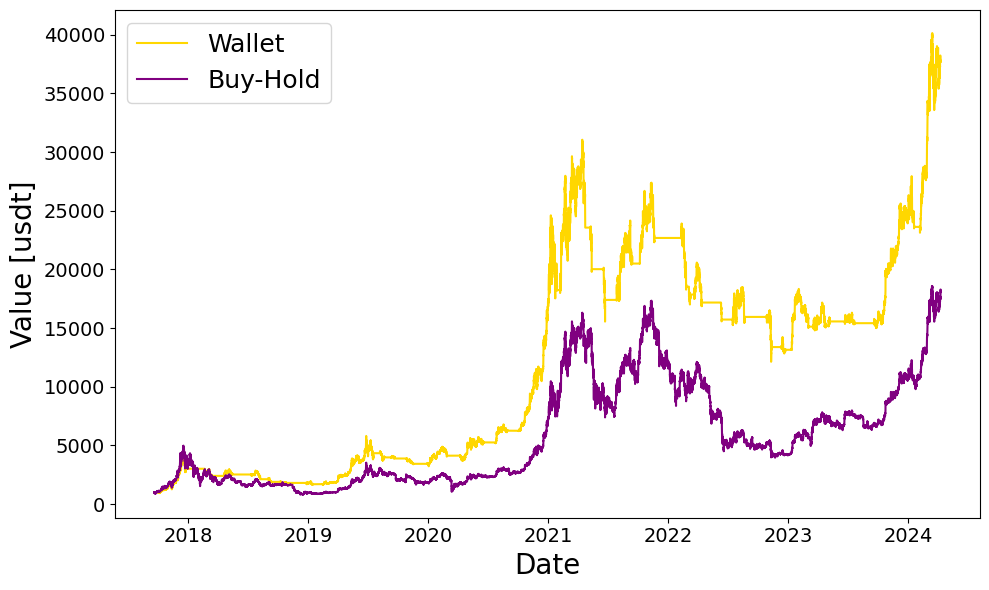

In [ ]:
print(
    "\nStarting amount: %s USDT"
    % (
        "{:0,.2f}".format(starting_usdt),

    )
)
print(
    "Buy-Hold: \t %s USDT\t (%s%% profit)"
    % (
        "{:0,.2f}".format(buyhold[-1]),
        "{:0,.2f}".format((buyhold[-1] / starting_usdt - 1) * 100),
    )
)
print(
    "2-SMA: \t\t %s USDT\t (%s%% profit)"
    % (
        "{:0,.2f}".format(wallet[-1]),
        "{:0,.2f}".format((wallet[-1] / starting_usdt - 1) * 100),
    )
)

plt.figure(figsize=(10, 6))
plt.plot(
    data.index,
    wallet,
    label="Wallet",
    color="gold",
)
plt.plot(
    data.index,
    buyhold,
    label="Buy-Hold",
    color="purple",
)
plt.legend(fontsize=18, loc="upper left")
plt.ylabel("Value [usdt]", fontsize=20)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=14)
plt.tight_layout()